In [0]:
# data analysis for MUSIC data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from numpy import savetxt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 9

# extra added for using inbuilt sigmoid

from scipy.special import expit

In [0]:
op_cases = 10
train_df = pd.read_csv("TrainData.csv")
data_t = train_df.to_numpy()
x_train = data_t[:,1:29]
y_train = data_t[:,29:39]

val_df = pd.read_csv("ValData.csv")
data_v = val_df.to_numpy()
x_val = data_v[:,1:29]
y_val = data_v[:,29:39]

test_df = pd.read_csv("TestData.csv")
data_te = test_df.to_numpy()
x_test = data_te[:,1:29]
y_test = data_te[:,29:39]

In [5]:
print(x_train.shape)

(600, 28)


In [0]:
def sigmoidGrad(z):
    return expit(z)*(1-expit(z))

In [0]:
# cost function for 1 hidden layer Neural Network
def cost_function_NN1(theta,hlSize,numLabel,X,y,lam=0):
    m= X.shape[0]
    ipSize = X.shape[1]
    J=0

    t1 = theta[0:hlSize*(ipSize +1)].reshape(hlSize,ipSize+1)
    t2 = theta[hlSize*(ipSize +1) : (hlSize*(ipSize +1)) + (numLabel*(hlSize +1))].reshape(numLabel,hlSize+1)

    tGrad1 = np.zeros(t1.shape)
    tGrad2 = np.zeros(t2.shape)
    #print(X.shape,t1.shape)
    # Forward propogation algorithm
    z2 = np.append(np.ones((m,1)),X,axis =1).dot(t1.T)
    a2 = expit(z2)
    z3 = np.append(np.ones((m,1)),a2,axis=1).dot(t2.T)
    a3 = expit(z3)
    h = a3
    J = (-1/m)*np.sum( y*np.log(h + 1e-20) + (1-y)*np.log(1-h + 1e-20)) 
    #Reg = 
    
    # Back propogation algorithm
    D2=np.zeros(t2.shape)
    D1=np.zeros(t1.shape)
    err3 = h - y
    l = t2.shape[1]
    err2 = (err3.dot(t2[:,1:l])) * sigmoidGrad(z2) 
    for i in range(m):
        D2 = D2 + (err3[i:i+1,:].T).dot(np.append(np.ones((1,1)),a2[i:i+1,:],axis=1))
        D1 = D1 + (err2[i:i+1,:].T).dot(np.append(np.ones((1,1)),X[i:i+1,:],axis=1))
    tGrad1 = D1/m
    #tGrad1[:,1:tGrad1.shape[1]] = tGrad1[:,1:tGrad1.shape[1]] + lam/m*t1[:,1:t1.shape[1]]
    tGrad2 = D2/m
    #tGrad2[:,1:tGrad2.shape[1]] = tGrad2[:,1:tGrad2.shape[1]] + lam/m*t2[:,1:t2.shape[1]]

    #print(tGrad1, tGrad2)
    grad = np.concatenate([tGrad1.flat, tGrad2.flat])
    
    #print(grad.shape)
    return [J,grad,h]

In [0]:
# gradient descent algorithm for 1 hidden layer NN
def gradient_descent_NN1(X,y,theta,lam,max_itr,alpha,hlSize): # without regularisation !
    m=X.shape[0]
    J_hist=np.zeros((max_itr,1))
    
    numLabel = y.shape[1]
    for i in range(max_itr):
        [J,grad,h]=cost_function_NN1(theta, hlSize, numLabel, X, y, lam)
        
        theta = theta - (alpha)*(grad) 
        J_hist[i]=J
    return [theta,J_hist]

In [0]:
# check if gradien found from back propogation is correct
def gradient_check_NN1(theta,hlSize,numLabel,X,y):
    #m= X.shape[0]
    #ipSize = X.shape[1]
    appGrad = np.zeros(theta.shape)

    #t1 = theta[0:hlSize*(ipSize +1)].reshape(hlSize,ipSize+1)
    #t2 = theta[hlSize*(ipSize +1) : (hlSize*(ipSize +1)) + (numLabel*(hlSize +1))+1].reshape(numLabel,hlSize+1)

    #tGrad1 = np.zeros(t1.shape)
    #tGrad2 = np.zeros(t2.shape)
    epsilon =.0001
    
    for i in range(theta.shape[0]):
        posTheta = theta
        posTheta[i:i+1] = posTheta[i:i+1] + epsilon
        posJ,gr,h = cost_function_NN1(posTheta, hlSize, numLabel, X, y)
        negTheta = theta
        negTheta[i:i+1] = negTheta[i:i+1] - epsilon
        negJ,gr,h = cost_function_NN1(negTheta, hlSize, numLabel, X, y)
        appGrad[i:i+1]=((posJ-negJ)/(2*epsilon))
        
    print(posJ,negJ)
    return appGrad

In [0]:
def prediction(h,y):
    
    count =0
    h_out = np.zeros(h.shape)
    
    for i in range(h.shape[0]):
        if h.shape[1] == 1:
            if h[i] >= 0.5:
                h_out[i] = 1
        else:
            h_out[i, np.argmax(h[i,:])] =1
    
    
    for i in range(h.shape[0]):
        for j in range(h.shape[1]):
            if h_out[i,j]!=y[i,j]:
                count = count+1
                break
    acc = (h.shape[0] - count)/h.shape[0] *100
    return [h_out, acc]


In [0]:
ipSize = x_train.shape[1]
hlSize = 100 #1* x_train.shape[1]
numLabel = y_train.shape[1]
E0= 0.01
itheta1 = np.random.randint(1,10,(hlSize,ipSize+1))
itheta1 = itheta1*2*E0 - E0
itheta2 = np.random.randint(1,10,(numLabel,hlSize+1))
itheta2 = itheta2*2*E0 - E0
initial_theta = np.concatenate([itheta1.flat, itheta2.flat])

In [0]:
lam =0
alpha =.001
max_itr = 1000


In [0]:

J,grad,h = cost_function_NN1(initial_theta, hlSize, numLabel, x_train, y_train)
appGrad = gradient_check_NN1(initial_theta, hlSize, numLabel, x_train, y_train)
for i in range(grad.shape[0]):
    print("{}   {}      {}".format(grad[i],appGrad[i],i))

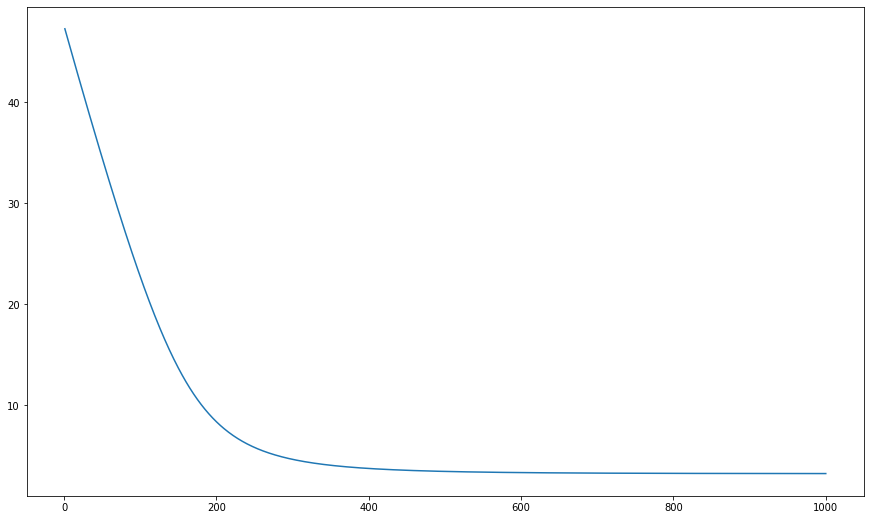


accuracy (train):   11.0

accuracy:   7.000000000000001
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]      [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]      [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]      [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]      [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]      [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]      [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]      [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]      [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]      [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]      [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]      [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]      [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]      [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]  

In [79]:
theta,J_hist = gradient_descent_NN(x_train, y_train, initial_theta, lam, max_itr, alpha, hlSize)
i=np.arange(1,1001,1) 
plt.plot(i,J_hist)
plt.show()  

#learning_curve(hlSize,numLabel,x_train, x_val, y_train, y_val, theta, lam)

[J,grad,h_train]=cost_function_NN1(theta, hlSize, numLabel, x_train, y_train)
h_train,acc=prediction(h_train,y_train)
print("\naccuracy (train):  ",acc)

[J,grad,h_test]=cost_function_NN1(theta, hlSize, numLabel, x_test, y_test)
h_test,acc=prediction(h_test,y_test)
print("\naccuracy:  ",acc)    
for i in range(y_test.shape[0]):
    print( "{}      {} " .format(h_test[i] , y_test[i]))

In [69]:
print(acc) # alpha =.5

18.5


In [72]:
print(acc,hlSize) # alpha = .01

7.000000000000001 100
